<a href="https://colab.research.google.com/github/Nademm-khans/Plant-Village-using-CNN/blob/main/Copy_of_image_segmentattion_coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Necessary Imports
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load dataset
!ls "/content/drive/MyDrive/Dataset"

'drug treated cell images'  'Normal cell images'


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Set image dimensions
IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS = 256, 256, 3

# Function to load images and masks
def load_images(data_dir):
    images = []
    labels = []  # For masks or labels if needed
    valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp')

    # Walk through all subdirectories in the main directory
    for root, dirs, files in os.walk(data_dir):
        for filename in files:
            if filename.lower().endswith(valid_extensions):
                img_path = os.path.join(root, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH))
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

                    # Normalize images
                    img = img / 255.0  # Scale to [0, 1]
                    images.append(img)

                    # If you have corresponding masks
                    mask_path = os.path.join(root, 'masks', filename)  # Adjust according to your structure
                    if os.path.exists(mask_path):
                        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # Load mask in grayscale
                        mask = cv2.resize(mask, (IMG_HEIGHT, IMG_WIDTH))
                        mask = mask / 255.0  # Normalize mask if needed
                        labels.append(mask)
                    else:
                        labels.append(np.zeros((IMG_HEIGHT, IMG_WIDTH)))  # Placeholder if no mask found

                else:
                    print(f"Failed to load image: {img_path}")
            else:
                print(f"Skipped non-image file: {filename}")

    return np.array(images), np.array(labels)

# Load images from both directories
data_dir_normal = '/content/drive/MyDrive/Dataset/Normal cell images'
data_dir_treated = '/content/drive/MyDrive/Dataset/drug treated cell images'

X_normal, y_normal = load_images(data_dir_normal)
print(f"Loaded {len(X_normal)} normal images with masks.")

X_treated, y_treated = load_images(data_dir_treated)
print(f"Loaded {len(X_treated)} treated images with masks.")

# Combine datasets
X_combined = np.concatenate((X_normal, X_treated), axis=0)
y_combined = np.concatenate((y_normal, y_treated), axis=0)

print(f"Total images in combined dataset: {len(X_combined)}")


Loaded 100 normal images with masks.
Loaded 69 treated images with masks.
Total images in combined dataset: 169


Loaded 100 normal images.
Loaded 69 treated images.
Total images in combined dataset: 169


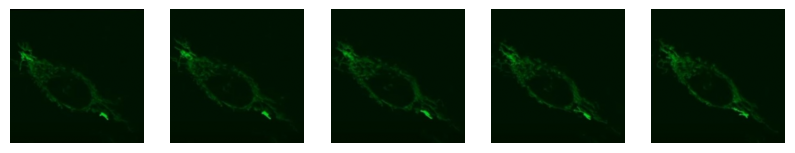

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS = 256, 256, 3

data_dir_normal = '/content/drive/MyDrive/Dataset/Normal cell images'
data_dir_treated = '/content/drive/MyDrive/Dataset/drug treated cell images'

def load_images_from_subfolders(data_dir):
    images = []
    valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp')

    # Walk through all subdirectories and files in the main directory
    for root, dirs, files in os.walk(data_dir):
        for filename in files:
            if filename.lower().endswith(valid_extensions):
                img_path = os.path.join(root, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH))
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    img = img / 255.0
                    images.append(img)
                else:
                    print(f"Failed to load image: {img_path}")
            else:
                print(f"Skipped non-image file: {filename}")

    return np.array(images)

# Load images from both directories
X_normal = load_images_from_subfolders(data_dir_normal)
print(f"Loaded {len(X_normal)} normal images.")

X_treated = load_images_from_subfolders(data_dir_treated)
print(f"Loaded {len(X_treated)} treated images.")

# Combine and check results
X_combined = np.concatenate((X_normal, X_treated), axis=0)
print(f"Total images in combined dataset: {len(X_combined)}")

def plot_sample_images(images, num=5):
    plt.figure(figsize=(10, 10))
    for i in range(min(num, len(images))):
        plt.subplot(1, num, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
    plt.show()

if len(X_combined) > 0:
    plot_sample_images(X_combined, num=5)
else:
    print("No images to display.")


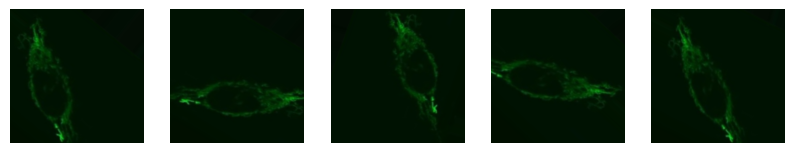

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Instead of importing from keras.preprocessing.image, use tensorflow.keras.preprocessing.image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation setup
data_gen_args = dict(rotation_range=90,
                     width_shift_range=0.1,
                     height_shift_range=0.1,
                     shear_range=0.2,
                     zoom_range=0.2,
                     horizontal_flip=True,
                     fill_mode='nearest')

image_datagen = ImageDataGenerator(**data_gen_args)

# Load a sample image (assuming you have at least one image in your dataset)
# For this example, let's assume you're loading from the normal images
sample_image_path = '/content/drive/MyDrive/Dataset/Normal cell images/Nimages (1)/1a (1).jpg'  # Change to your image path
sample_image = cv2.imread(sample_image_path)
sample_image = cv2.resize(sample_image, (256, 256))  # Resize to match your data
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB) / 255.0  # Normalize to [0, 1]

# Expand dimensions to match the input shape required by the generator
sample_image = np.expand_dims(sample_image, axis=0)

# Generate augmented images
augmented_images = image_datagen.flow(sample_image, batch_size=1)

# Visualize the augmented images
def plot_augmented_images(augmented_images, num=5):
    plt.figure(figsize=(10, 10))
    for i in range(num):
        img = next(augmented_images)[0]  # Get the next augmented image
        plt.subplot(1, num, i + 1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

# Plot augmented images
plot_augmented_images(augmented_images, num=5)

In [ ]:
# Load images from both directories
data_dir_normal = '/content/drive/MyDrive/Dataset/Normal cell images'
data_dir_treated = '/content/drive/MyDrive/Dataset/drug treated cell images'

# Assuming load_images function returns the images and masks
X_normal, y_normal = load_images(data_dir_normal)
print(f"Loaded {len(X_normal)} normal images with masks.")

X_treated, y_treated = load_images(data_dir_treated)
print(f"Loaded {len(X_treated)} treated images with masks.")

# Combine datasets
X_combined = np.concatenate((X_normal, X_treated), axis=0)
y_combined = np.concatenate((y_normal, y_treated), axis=0)

# Print the total number of images and masks
print(f"Total images in combined dataset: {len(X_combined)}")
print(f"Total masks in combined dataset: {len(y_combined)}")

# Now attempt to split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.3, random_state=42)

# Print the sizes of the resulting datasets
print(f"Training images: {len(X_train)}, Testing images: {len(X_test)}")
print(f"Training masks: {len(y_train)}, Testing masks: {len(y_test)}")


Loaded 100 normal images with masks.
Loaded 69 treated images with masks.
Total images in combined dataset: 169
Total masks in combined dataset: 169
Training images: 118, Testing images: 51
Training masks: 118, Testing masks: 51


In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Concatenate
from tensorflow.keras.models import Model

# Define the U-Net model for RGB images (input shape is (256, 256, 3) for RGB)
def create_unet_model(input_shape=(256, 256, 3)):  # Change input shape to (256, 256, 3)
    inputs = Input(input_shape)

    # Encoder
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    # Bottleneck
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)

    # Decoder
    u4 = UpSampling2D((2, 2))(c3)
    u4 = Concatenate()([u4, c2])
    c4 = Conv2D(128, (3, 3), activation='relu', padding='same')(u4)
    c4 = Conv2D(128, (3, 3), activation='relu', padding='same')(c4)

    u5 = UpSampling2D((2, 2))(c4)
    u5 = Concatenate()([u5, c1])
    c5 = Conv2D(64, (3, 3), activation='relu', padding='same')(u5)
    c5 = Conv2D(64, (3, 3), activation='relu', padding='same')(c5)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c5)

    model = Model(inputs, outputs)
    return model
    # Model summary
    model.summary()

# Create and compile the model
model = create_unet_model()  # Now the model expects RGB images
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=5)  # Training with validation split


Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 445s 150s/step - accuracy: 0.5142 - loss: 0.5963 - val_accuracy: 1.0000 - val_loss: 0.0125
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 424s 145s/step - accuracy: 1.0000 - loss: 0.0083 - val_accuracy: 1.0000 - val_loss: 1.1921e-07
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 440s 143s/step - accuracy: 1.0000 - loss: 1.1921e-07 - val_accuracy: 1.0000 - val_loss: 1.1921e-07
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 454s 150s/step - accuracy: 1.0000 - loss: 1.1921e-07 - val_accuracy: 1.0000 - val_loss: 1.1921e-07
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 425s 142s/step - accuracy: 1.0000 - loss: 1.1921e-07 - val_accuracy: 1.0000 - val_loss: 1.1921e-07


In [ ]:
# Evaluate the model
_, accuracy = model.evaluate(X_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 62s 24s/step - accuracy: 1.0000 - loss: 1.1921e-07
Model Accuracy: 100.00%


In [ ]:
# Define Intersection over Union (IoU) metric for evaluation
def iou_metric(y_true, y_pred):
    y_pred = np.round(y_pred)
    intersection = np.sum(np.abs(y_true * y_pred))
    union = np.sum(y_true) + np.sum(y_pred) - intersection
    return intersection / union

In [ ]:
# Get IoU score
y_pred = model.predict(X_test)
y_pred = np.squeeze(y_pred, axis=-1)  # Remove the last dimension
iou_score = iou_metric(y_test, y_pred)
print(f"Model IoU Score: {iou_score:.2f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 67s 23s/step
Model IoU Score: nan


<ipython-input-11-9b81d9ec73cd>:6: RuntimeWarning: invalid value encountered in scalar divide
  return intersection / union


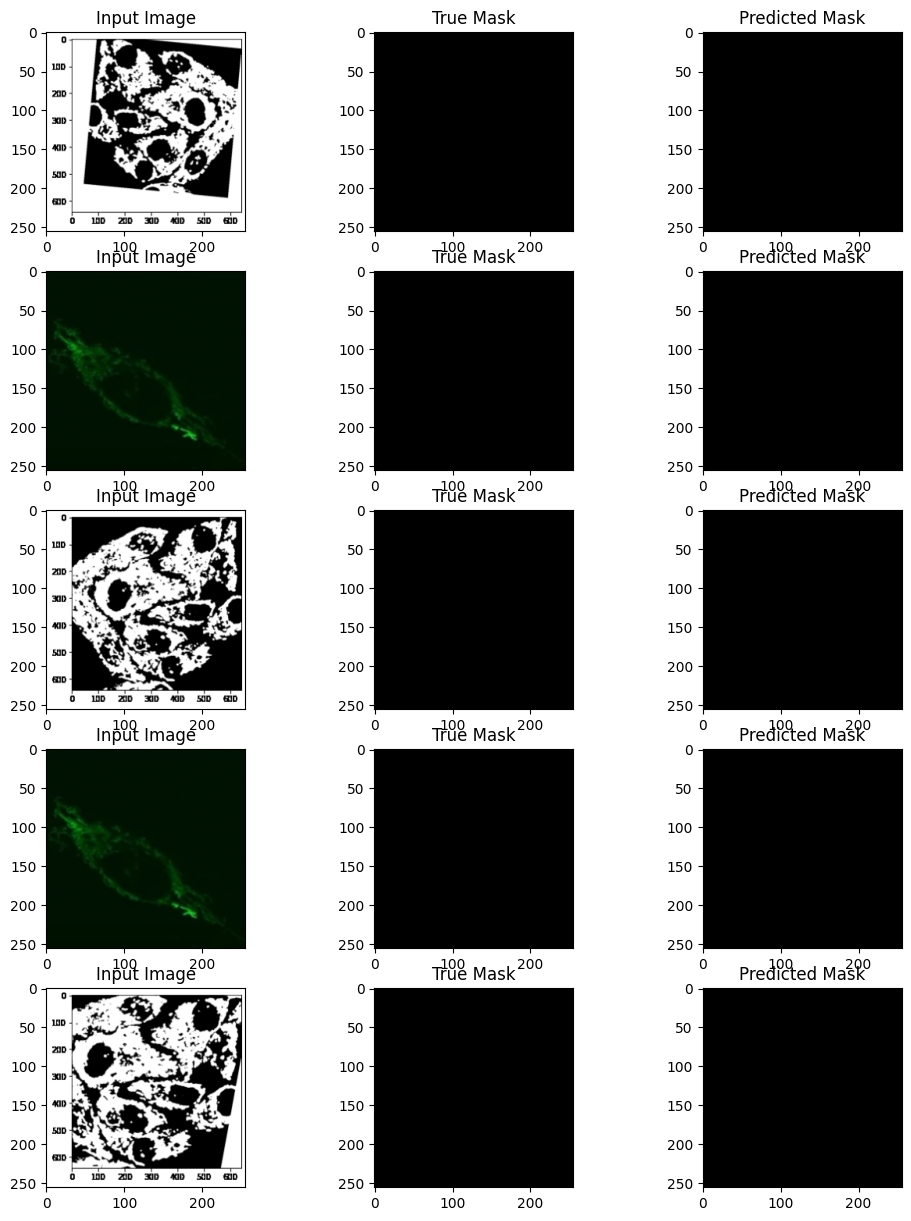

In [ ]:
# Plot some test results
def plot_predictions(X_test, y_test, y_pred, num=5):
    plt.figure(figsize=(12, num*3))
    for i in range(num):
        plt.subplot(num, 3, i*3 + 1)
        plt.imshow(X_test[i])
        plt.title("Input Image")
        plt.subplot(num, 3, i*3 + 2)
        plt.imshow(y_test[i].squeeze(), cmap='gray')
        plt.title("True Mask")
        plt.subplot(num, 3, i*3 + 3)
        plt.imshow(y_pred[i].squeeze(), cmap='gray')
        plt.title("Predicted Mask")
    plt.show()

plot_predictions(X_test, y_test, y_pred)

Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 500s 119s/step - accuracy: 1.0000 - loss: 1.1921e-07
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 504s 123s/step - accuracy: 1.0000 - loss: 1.1921e-07
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 553s 120s/step - accuracy: 1.0000 - loss: 1.1921e-07
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 502s 120s/step - accuracy: 1.0000 - loss: 1.1921e-07
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 500s 119s/step - accuracy: 1.0000 - loss: 1.1921e-07


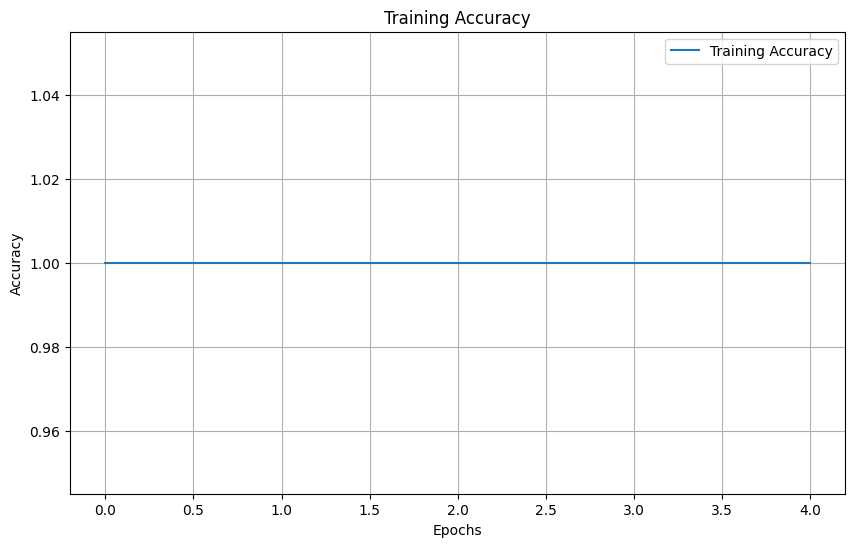

In [ ]:
# Train the model without validation data
history = model.fit(X_train, y_train, epochs=5)

# Plot training accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.grid()
plt.show()

Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 453s 151s/step - accuracy: 1.0000 - loss: 1.1921e-07 - val_accuracy: 1.0000 - val_loss: 1.1921e-07
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 483s 150s/step - accuracy: 1.0000 - loss: 1.1921e-07 - val_accuracy: 1.0000 - val_loss: 1.1921e-07
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 426s 143s/step - accuracy: 1.0000 - loss: 1.1921e-07 - val_accuracy: 1.0000 - val_loss: 1.1921e-07
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 460s 150s/step - accuracy: 1.0000 - loss: 1.1921e-07 - val_accuracy: 1.0000 - val_loss: 1.1921e-07
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 428s 143s/step - accuracy: 1.0000 - loss: 1.1921e-07 - val_accuracy: 1.0000 - val_loss: 1.1921e-07


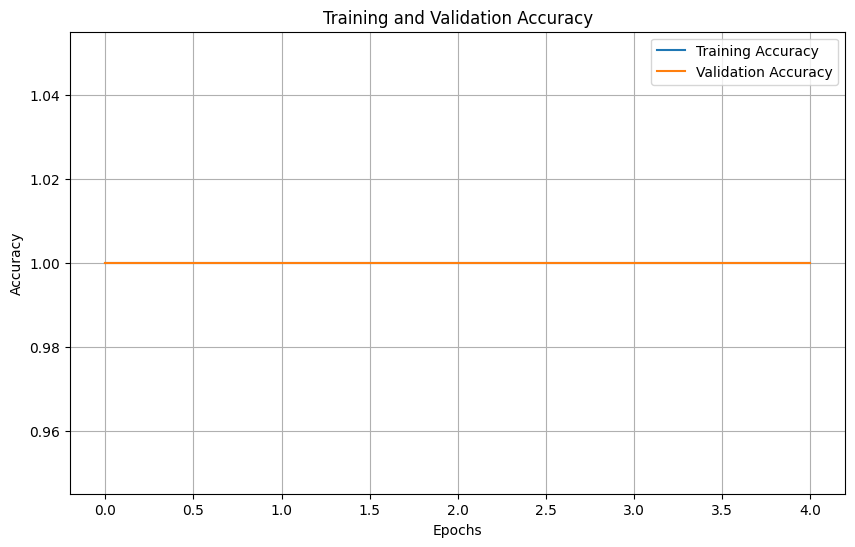

In [ ]:
# Train the model with a validation split
history = model.fit(X_train, y_train, validation_split=0.2, epochs=5)

# Plot accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid()
plt.show()
